# Handle Categorical Variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.One Hot Encoding

In [2]:
df = pd.read_csv('train1.csv', usecols = ['Sex'])

In [5]:
df = pd.get_dummies(df, drop_first = True)

In [7]:
df.head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [8]:
df = pd.read_csv('train1.csv', usecols = ['Embarked'])

In [9]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [10]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df.dropna(inplace =  True)

In [16]:
df.Embarked.isnull().sum()

0

In [18]:
pd.get_dummies(df, drop_first = True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
###### One Hot Encoding with many categories in features

In [25]:
df = pd.read_csv('train2.csv', usecols = ['X0','X1','X2','X3', 'X4','X5','X6'])

In [26]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [28]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [29]:
df['X1'].value_counts().sort_values(ascending = False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [30]:
list_10 = df['X1'].value_counts().sort_values(ascending = False).head(10).index

In [37]:
list_10 = list(list_10)

In [38]:
for categories in list_10:
    df[categories] = np.where(df['X1'] == categories, 1, 0)

In [39]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0


In [40]:
list_10.append('X1')

In [43]:
df[list_10].head(10)

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
5,0,0,1,0,0,0,0,0,0,0,b
6,0,0,0,0,0,1,0,0,0,0,r
7,0,0,0,1,0,0,0,0,0,0,l
8,0,1,0,0,0,0,0,0,0,0,s
9,0,0,1,0,0,0,0,0,0,0,b


# 2. Ordinal Number Encoding

In [121]:
import datetime as dt
from datetime import date
import calendar

In [122]:
today_date = datetime.datetime.today()

In [123]:
type(today_date)

datetime.datetime

In [124]:
today_date - datetime.timedelta(2)

datetime.datetime(2021, 7, 26, 16, 27, 39, 766186)

In [125]:
###### List Comprehension

In [126]:
days = [today_date - datetime.timedelta(x) for x in range(0,15)]

In [127]:
import pandas as pd

In [128]:
df = pd.DataFrame(days)

In [129]:
df.columns = ['Day']

In [130]:
df.head()

,Day
0,2021-07-28 16:27:39.766186
1,2021-07-27 16:27:39.766186
2,2021-07-26 16:27:39.766186
3,2021-07-25 16:27:39.766186
4,2021-07-24 16:27:39.766186


In [131]:
df['Day'].dt.day

0     28
1     27
2     26
3     25
4     24
5     23
6     22
7     21
8     20
9     19
10    18
11    17
12    16
13    15
14    14
Name: Day, dtype: int64

In [132]:
df['weekday']=df['Day'].dt.weekday
df.head()

,Day,weekday
0,2021-07-28 16:27:39.766186,2
1,2021-07-27 16:27:39.766186,1
2,2021-07-26 16:27:39.766186,0
3,2021-07-25 16:27:39.766186,6
4,2021-07-24 16:27:39.766186,5


In [133]:
dictionary = {0:1,1:2,2:3,3:4,4:5,5:6,6:7}

In [134]:
df['weekday_ordinal'] = df['weekday'].map(dictionary)

In [135]:
df.head()

,Day,weekday,weekday_ordinal
0,2021-07-28 16:27:39.766186,2,3
1,2021-07-27 16:27:39.766186,1,2
2,2021-07-26 16:27:39.766186,0,1
3,2021-07-25 16:27:39.766186,6,7
4,2021-07-24 16:27:39.766186,5,6


# 3. Frequency Encoding

In [16]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
columns = [1,3,5,6,7,8,9,13]

In [18]:
train_set= train_set[columns]

In [19]:
train_set

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [20]:
train_set.columns = ['Employment','Degree','Status','Designation','Family_job','Race','Sex', 'Country']

In [21]:
train_set.head()

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [22]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
Family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [23]:
train_set['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [24]:
train_set['Country'].value_counts().to_dict()

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [25]:
country_map = train_set['Country'].value_counts().to_dict()

In [27]:
train_set['Country_count'] = train_set['Country'].map(country_map)

In [28]:
train_set.head()

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country,Country_count
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,95


# 4. Target Guided Ordinal Encoding

1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('train1.csv', usecols = ['Cabin', 'Survived'])

In [31]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [32]:
df.isnull().sum()

Survived      0
Cabin       687
dtype: int64

In [34]:
df['Cabin'].fillna('Missing', inplace = True)

In [35]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


<AxesSubplot:>

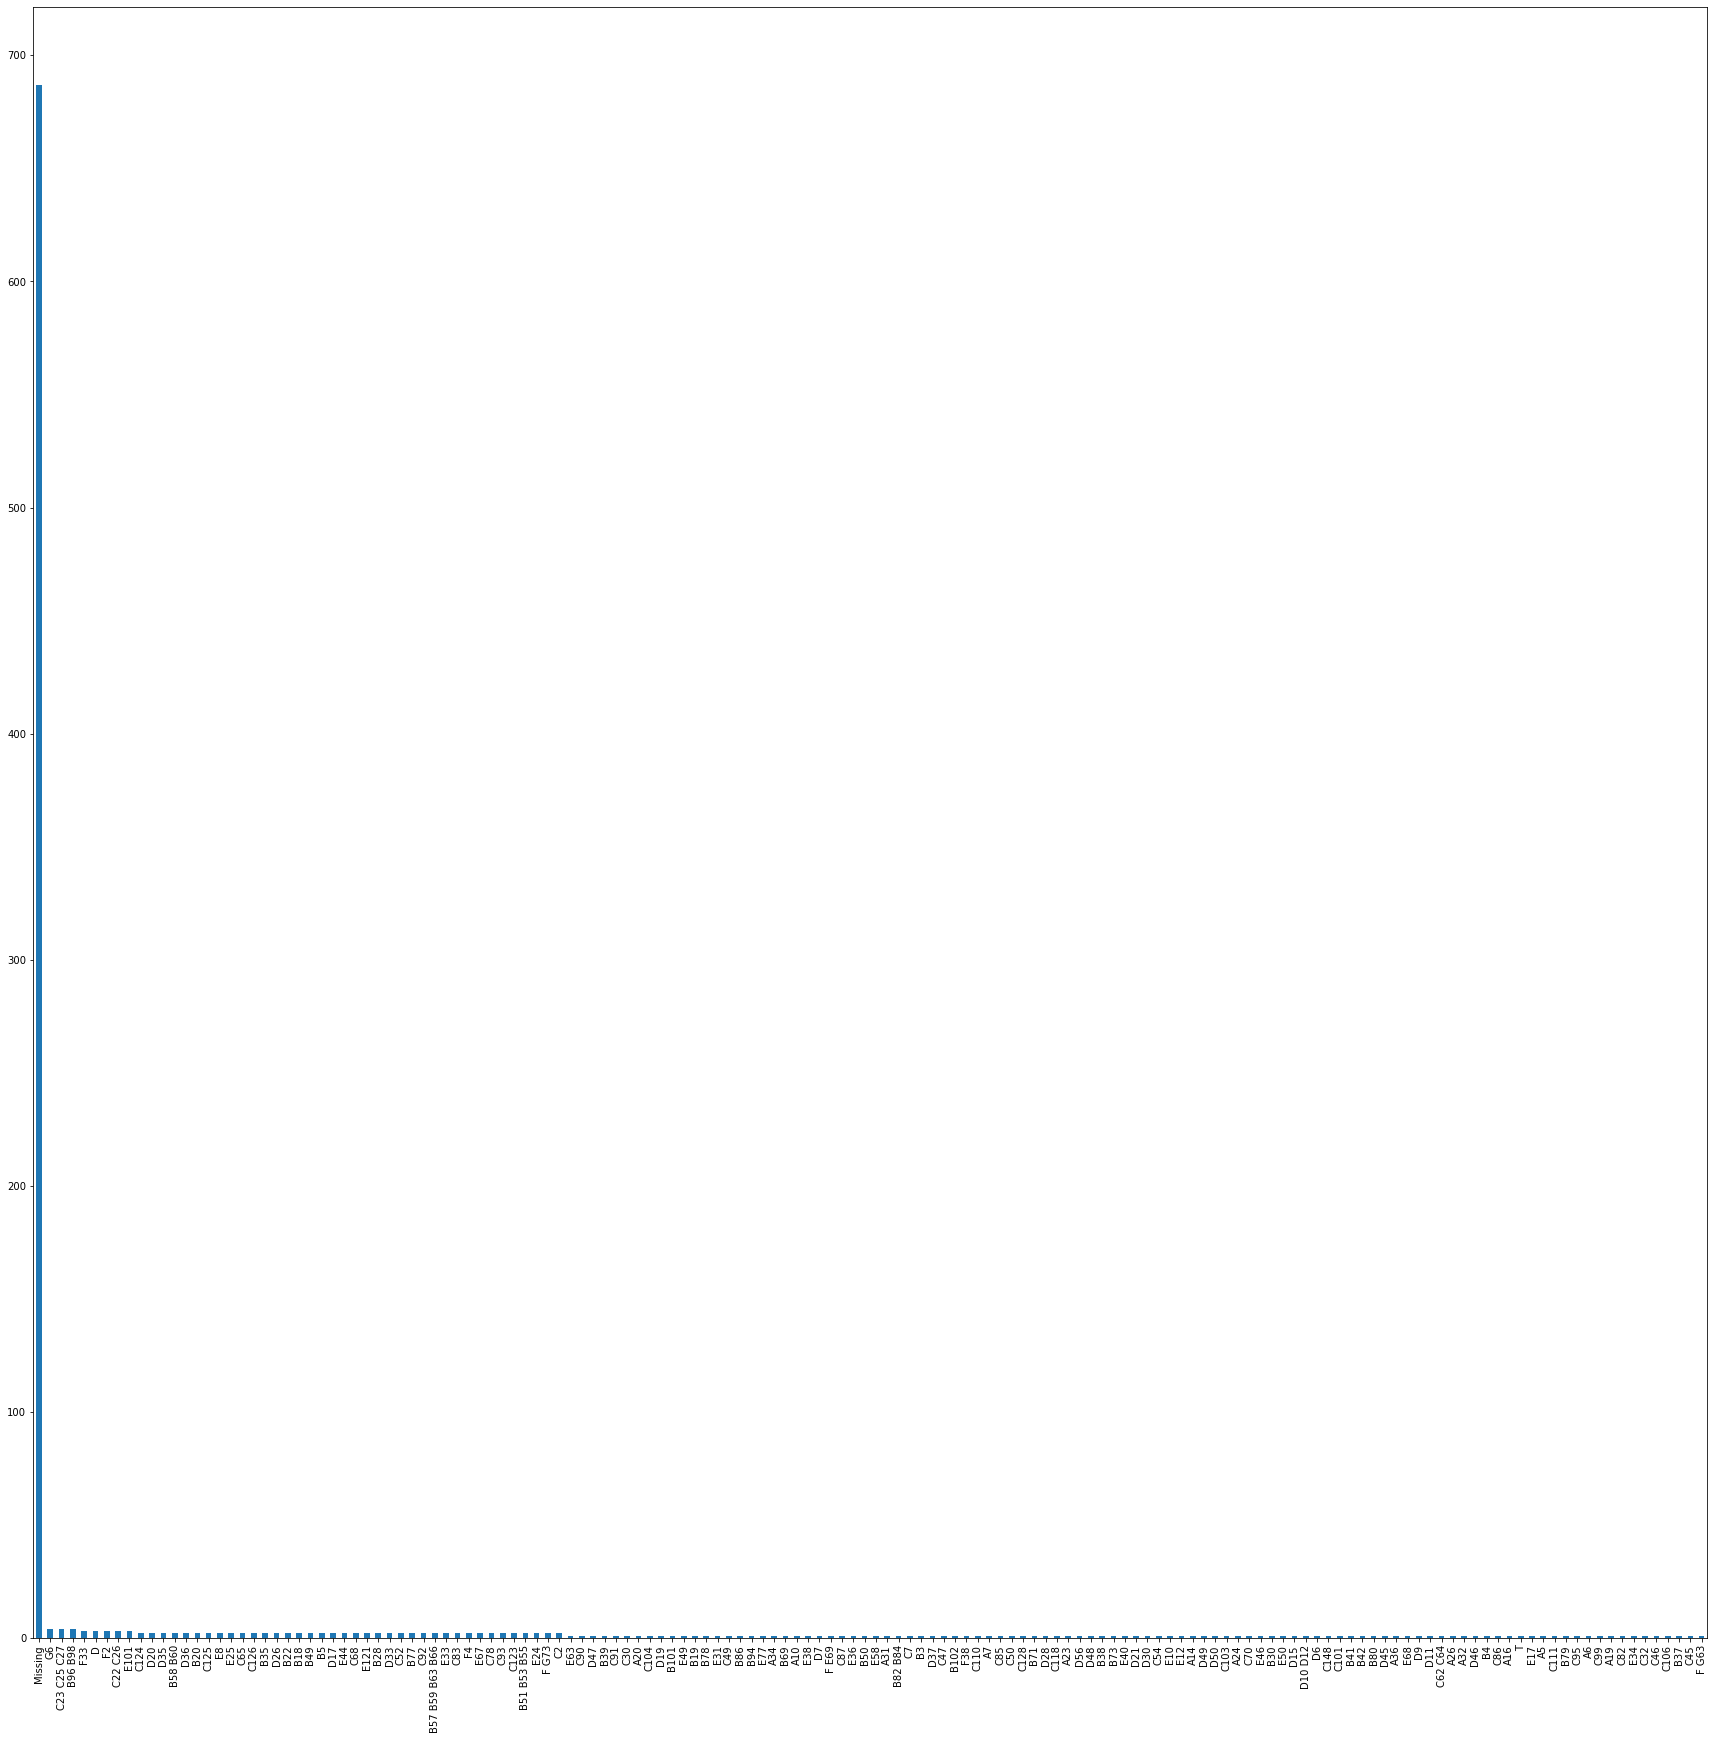

In [38]:
plt.figure(figsize = (30,30))
df['Cabin'].value_counts().plot.bar()

In [39]:
df.isnull().sum()

Survived    0
Cabin       0
dtype: int64

In [44]:
new = df.Cabin.value_counts().to_dict()

In [56]:
list(new)

['Missing',
 'G6',
 'C23 C25 C27',
 'B96 B98',
 'F33',
 'D',
 'F2',
 'C22 C26',
 'E101',
 'C124',
 'D20',
 'D35',
 'B58 B60',
 'D36',
 'B20',
 'C125',
 'E8',
 'E25',
 'C65',
 'C126',
 'B35',
 'D26',
 'B22',
 'B18',
 'B49',
 'B5',
 'D17',
 'E44',
 'C68',
 'E121',
 'B28',
 'D33',
 'C52',
 'B77',
 'C92',
 'B57 B59 B63 B66',
 'E33',
 'C83',
 'F4',
 'E67',
 'C78',
 'C93',
 'C123',
 'B51 B53 B55',
 'E24',
 'F G73',
 'C2',
 'E63',
 'C90',
 'D47',
 'B39',
 'C91',
 'C30',
 'A20',
 'C104',
 'D19',
 'B101',
 'E49',
 'B19',
 'B78',
 'E31',
 'C49',
 'B86',
 'B94',
 'E77',
 'A34',
 'B69',
 'A10',
 'E38',
 'D7',
 'F E69',
 'C87',
 'E36',
 'B50',
 'E58',
 'A31',
 'B82 B84',
 'C7',
 'B3',
 'D37',
 'C47',
 'B102',
 'F38',
 'C110',
 'A7',
 'C85',
 'C50',
 'C128',
 'B71',
 'D28',
 'C118',
 'A23',
 'D56',
 'D48',
 'B38',
 'B73',
 'E40',
 'D21',
 'D30',
 'C54',
 'E10',
 'E12',
 'A14',
 'D49',
 'D50',
 'C103',
 'A24',
 'C70',
 'E46',
 'B30',
 'E50',
 'D15',
 'D10 D12',
 'D6',
 'C148',
 'C101',
 'B41',
 'B42'

In [57]:
[print(x[0]) for x in new]

M
G
C
B
F
D
F
C
E
C
D
D
B
D
B
C
E
E
C
C
B
D
B
B
B
B
D
E
C
E
B
D
C
B
C
B
E
C
F
E
C
C
C
B
E
F
C
E
C
D
B
C
C
A
C
D
B
E
B
B
E
C
B
B
E
A
B
A
E
D
F
C
E
B
E
A
B
C
B
D
C
B
F
C
A
C
C
C
B
D
C
A
D
D
B
B
E
D
D
C
E
E
A
D
D
C
A
C
E
B
E
D
D
D
C
C
B
B
B
D
A
E
D
D
C
A
A
D
B
C
A
T
E
A
C
B
C
A
C
A
C
E
C
C
C
B
C
F


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [59]:
df['Cabin'] = df.Cabin.astype(str).str[0]

In [60]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [61]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [64]:
##Probability of person surviving the accident wrt different cabins.
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [67]:
df.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [68]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [69]:
frequent_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [70]:
frequent_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [71]:
dictionary = {'T':0, 'M':1,'A':2,'G':3,'C':4,'F':5,'B':6,'E':7,'D':8}

In [72]:
df['Cabin_ordinal'] = df['Cabin'].map(dictionary)

In [73]:
df.head()

,Survived,Cabin,Cabin_ordinal
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


# 5. Mean Encoding

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('train1.csv', usecols = ['Survived','Cabin'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [76]:
df['Cabin'].fillna('Missing', inplace =  True)

In [77]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [79]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [80]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [83]:
df.groupby(['Cabin'])['Survived'].mean().to_dict()

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [84]:
mean_encode = df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [85]:
mean_encode

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [86]:
df['Cabin_Mean_Encode'] = df['Cabin'].map(mean_encode)
df.head()

,Survived,Cabin,Cabin_Mean_Encode
0,0,M,0.299854
1,1,C,0.593220
2,1,M,0.299854
3,1,C,0.593220
4,0,M,0.299854


In [88]:
##Disadvantages:
#1. Prone to Overfitting

# 6. Probability Ratio Encoding

In [126]:
import pandas as pd
import numpy as np

In [127]:
df = pd.read_csv('train1.csv', usecols = ['Cabin', 'Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [129]:
df['Cabin'].fillna('Missing', inplace = True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [132]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [135]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [136]:
prob_df = pd.DataFrame(prob_df)
prob_df.head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [137]:
prob_df['Died'] = 1 - prob_df['Survived']
prob_df['Ratio'] = prob_df['Survived']/ prob_df['Died']
prob_df.head()

,Survived,Died,Ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [138]:
new = prob_df['Ratio'].to_dict()
new

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [139]:
df['Cabin_Encoded'] = df['Cabin'].map(new)
df.head()

,Survived,Cabin,Cabin_Encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
